# Confusion Matrix

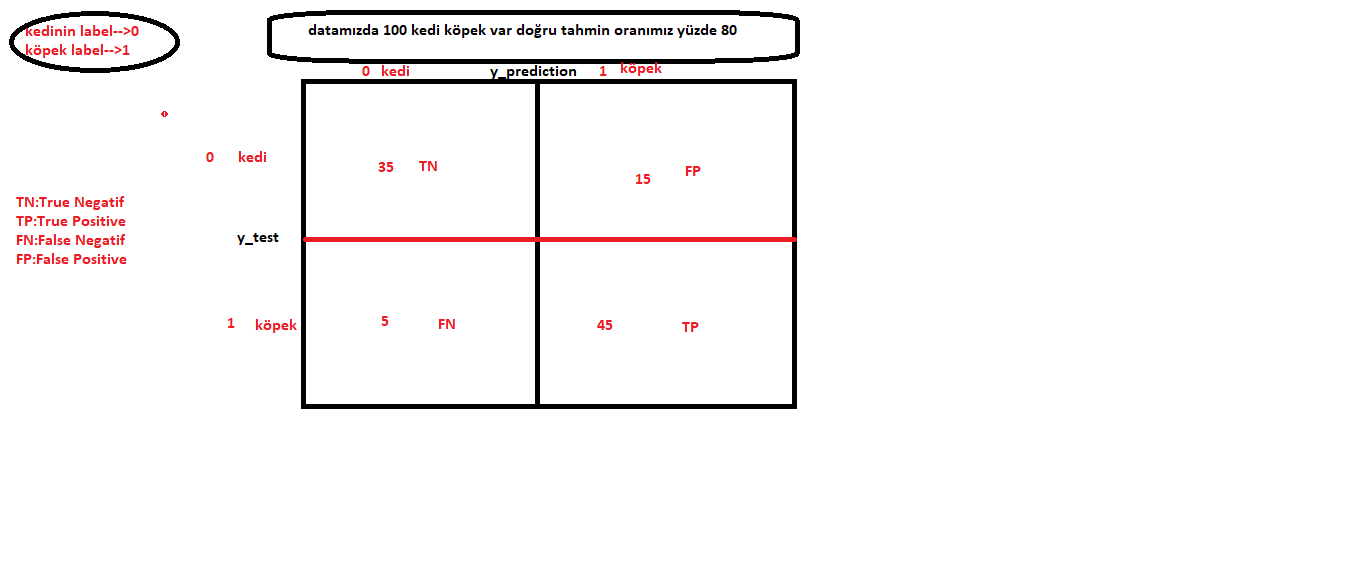

* Random Forest Classification Kullanıyorum

In [18]:
import pandas as pd
import numpy as np
data=pd.read_csv("data.csv")
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data["diagnosis"]=[1 if i=="M" else 0for i in data["diagnosis"]]

In [19]:
y=data["diagnosis"].values
x=data.drop(["diagnosis"],axis=1)
X=(x-np.min(x))/(np.max(x)-np.min(x))


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=48,test_size=0.2)

In [21]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
print(f"Random Forest Accuracy {model.score(X_test,y_test)}")

Random Forest Accuracy 0.9385964912280702


* Confusion Matrix Kullanma(y_prediction ve y_test lazım

In [22]:
y_pred=model.predict(X_test)


In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
cm

array([[65,  4],
       [ 3, 42]])

* Visualization

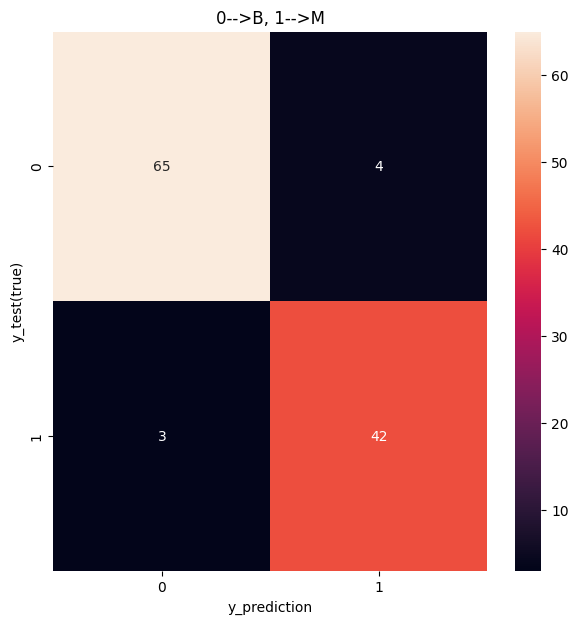

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True)
plt.xlabel("y_prediction")
plt.ylabel("y_test(true)")
plt.title("0-->B, 1-->M")
plt.show()